# Finance Data Project
#### **This project focuses on exploratory data analysis of stock prices using Pandas-Datareader, a Python package that allows us to read stock information directly from the internet. A lot of this project will focus on visualizations using visualization libraries such as matplotlib, seaborn, plotly and cufflinks, or just pandas.**

## Importing Libraries

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime 
%matplotlib inline

## Getting Data

We use pandas datareader to get stock data for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo 

**Used datetime to set start and end datetime objects (start time = 1st Jan 2006 and end time = 1st Jan  2016) for each of these banks**

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

**Created dataframes separately for each bank, with the name of that bank's ticker symbol, and used datareader to grab info on the stock prices using 'Stooq' as an API/site (since Google and Yahoo Finance stopped working)**

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [4]:
# Can also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

First checking BAC as the dataframe

In [5]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07


**Created a list of the ticker symbols (as strings) in alphabetical order and called this list as *tickers***

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Checking the panel objects in the dataframe named df before further operations  

In [7]:
df.head()

Attributes    Close                                                  High  \
Symbols         BAC        C       GS      JPM       MS      WFC      BAC   
Date                                                                        
2006-01-03  39.6217  407.891  105.883  28.9771  38.2361  22.9581  39.7023   
2006-01-04  39.2004  400.354  104.432  28.5626  38.2675  22.6917  39.7592   
2006-01-05  39.2525  402.321  104.394  28.6520  38.3715  22.6690  39.4126   
2006-01-06  39.1917  402.321  105.855  28.8543  38.4108  22.7983  39.4774   
2006-01-09  39.2181  400.432  107.128  29.3229  38.8120  22.7983  39.5294   

Attributes                             ...     Open                    \
Symbols           C       GS      JPM  ...       GS      JPM       MS   
Date                                   ...                              
2006-01-03  408.615  106.354  29.0970  ...  104.109  28.7148  37.4934   
2006-01-04  406.325  105.922  28.9428  ...  104.609  28.6824  38.4971   
2006-01-05  403.663  104.599  28.7030  ...  103.531  28.5556  38.2675   
2006-01-06  404.641  106.187  29.0125  ...  104.579  28.7846  38.5432   
2006-01-09  403.329  107.323  29.3593  ...  105.560  28.7522  38.4470   

Attributes                 Volume                                            \
Symbols         WFC           BAC             C            GS           JPM   
Date                                                                          
2006-01-03  22.7430  1.936396e+07  1.858097e+06  7.508235e+06  1.780695e+07   
2006-01-04  22.8831  2.110031e+07  2.260921e+06  5.917173e+06  1.871252e+07   
2006-01-05  22.6690  1.761312e+07  1.371893e+06  4.521468e+06  1.118271e+07   
2006-01-06  22.7302  1.496529e+07  1.655812e+06  5.257604e+06  1.104151e+07   
2006-01-09  22.7983  1.855918e+07  2.031072e+06  5.749209e+06  2.298942e+07   

Attributes                              
Symbols               MS           WFC  
Date                                    
2006-01-03  6.806387e+06  1.530724e+07  
2006-01-04  1.009857e+07  1.510382e+07  
2006-01-05  7.313990e+06  1.407726e+07  
2006-01-06  8.721337e+06  1.167705e+07  
2006-01-09  5.246244e+06  7.808415e+06  

[5 rows x 30 columns]

**Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks by setting the keys argument equal to the tickers list.**

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis =1,keys=tickers)

Checking the newly created dataframe

In [9]:
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 30 columns]

**Set the column name levels as Bank Ticker and Stock Info**

In [10]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']

Checking the dataframe to ensure the newly created columns are there.

In [11]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

## Exploratory Data Analysis (EDA)

**What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

**Create a new *empty DataFrame* called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by the equation below:**
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

In [14]:
returns

""


**Use pandas pct_change() method on the Close column to create a column representing this return value.** 

In [15]:
for tick in tickers:
    returns[tick+ ' Return']=bank_stocks[tick]['Close'].pct_change()

C:\Users\rajen\AppData\Local\Temp\ipykernel_18732\226043075.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns[tick+ ' Return']=bank_stocks[tick]['Close'].pct_change()


In [16]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


As a method, I created a for loop that goes in for each bank's stock ticker, creates this returns column with percentage return values based off of the Close columns in the bank_stocks DataFrame, and sets it as a column in the returns DataFrame.

**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

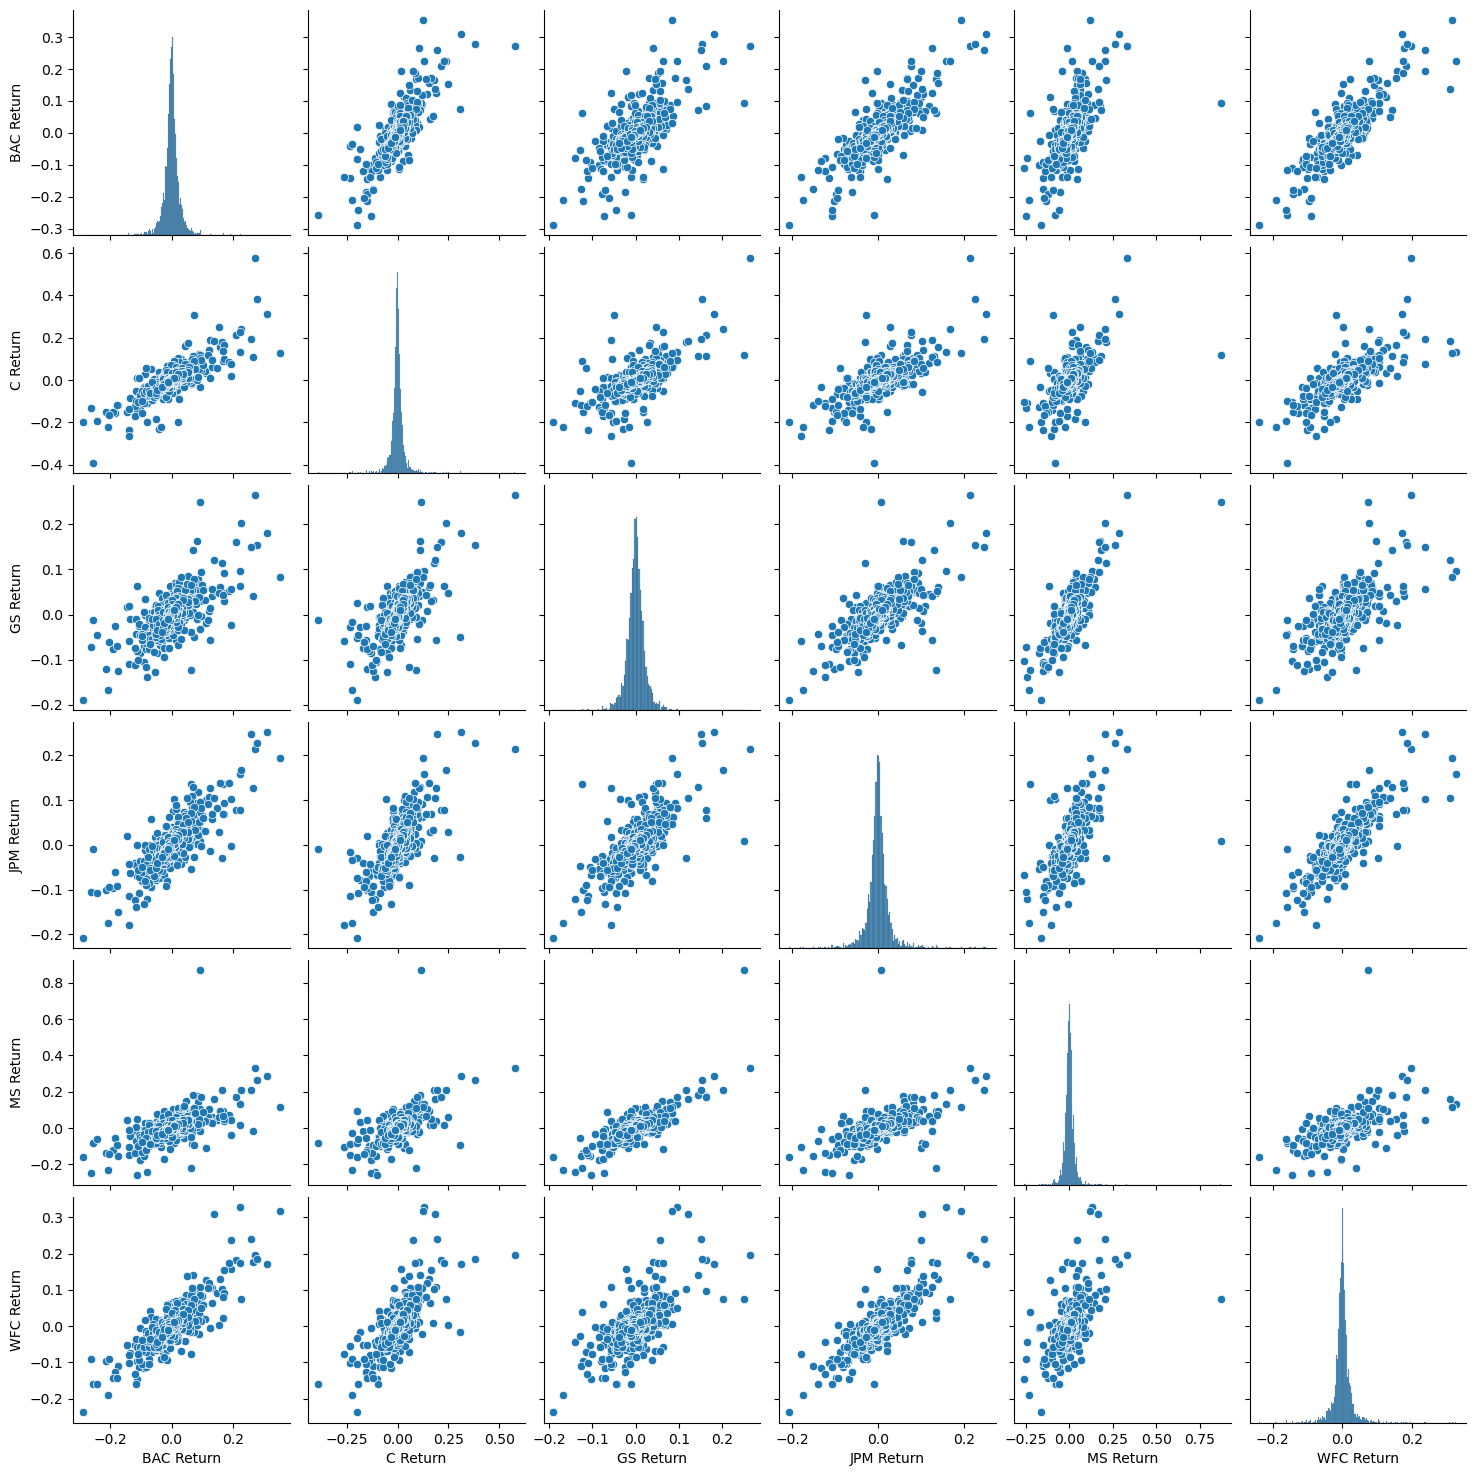

In [17]:
import seaborn as sns
sns.pairplot(returns[1:])

As far as scatter plots are concerned, there is some correlation between all banks' stocks.

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [19]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Four of the banks had the worst returns on 20 January 2009 as this was actually Barack Obama's inauguration date as the 44th president of the United States.

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In general, all bank stocks have very similar risk profiles over the entire time period.

In [21]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

All bank stocks have very similar risk profiles for the year 2015.

**Create a distplot/histplot using seaborn of the 2015 returns for Morgan Stanley**

<Axes: xlabel='MS Return', ylabel='Count'>

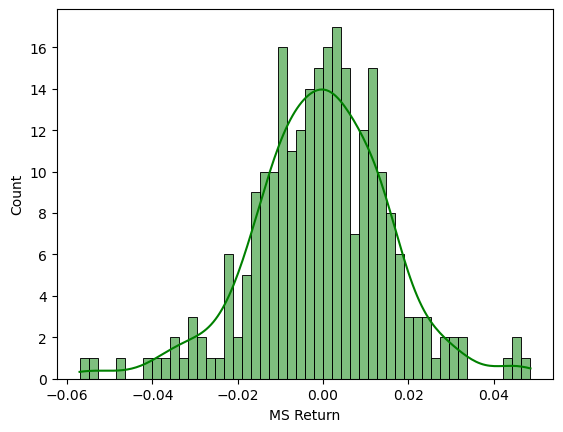

In [22]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], kde=True, color='green', bins=50)

**Create a distplot/histplot using seaborn of the 2008 returns for CitiGroup.**

<Axes: xlabel='C Return', ylabel='Count'>

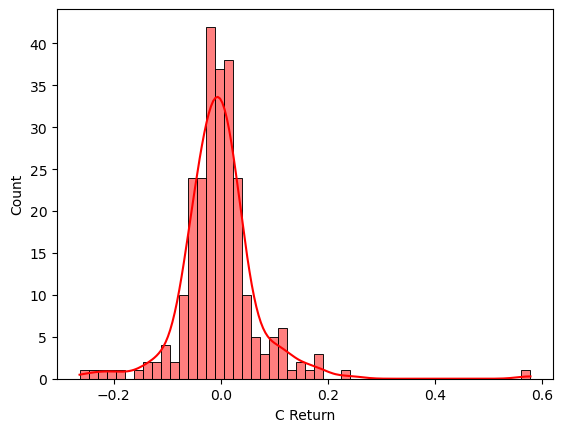

In [23]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], kde=True, color='red', bins=50)

## More Visualization

**Imports**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

*Using for loop method*

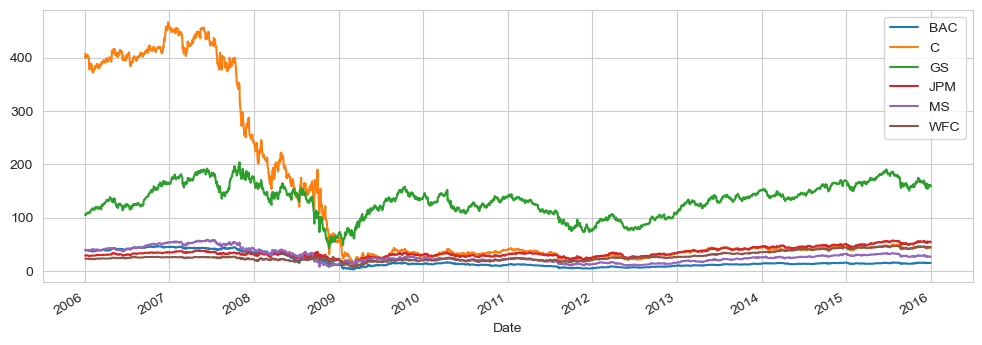

In [25]:
# Matplotlib way of doing this
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

*Using cross section method*

<Axes: xlabel='Date'>

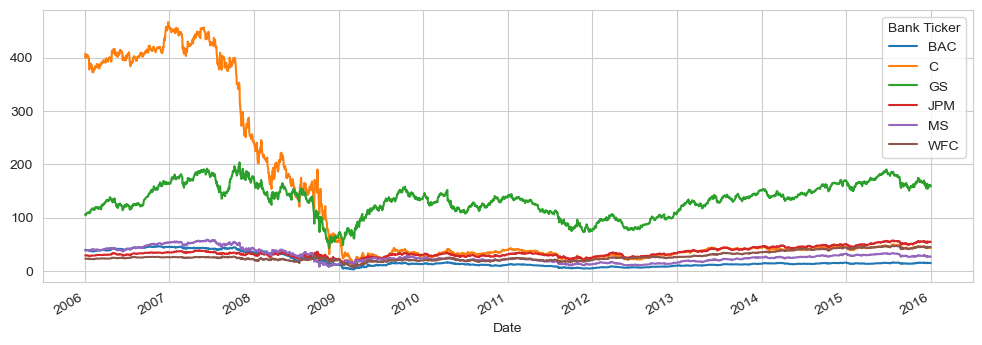

In [26]:
# Matplotlib way of doing this
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [27]:
# Plotly way of doing this (this is plotly's interactive plot.There is cufflinks wrapper over plotly)
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages
Analyzing the moving averages for these stocks in the year 2008.

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

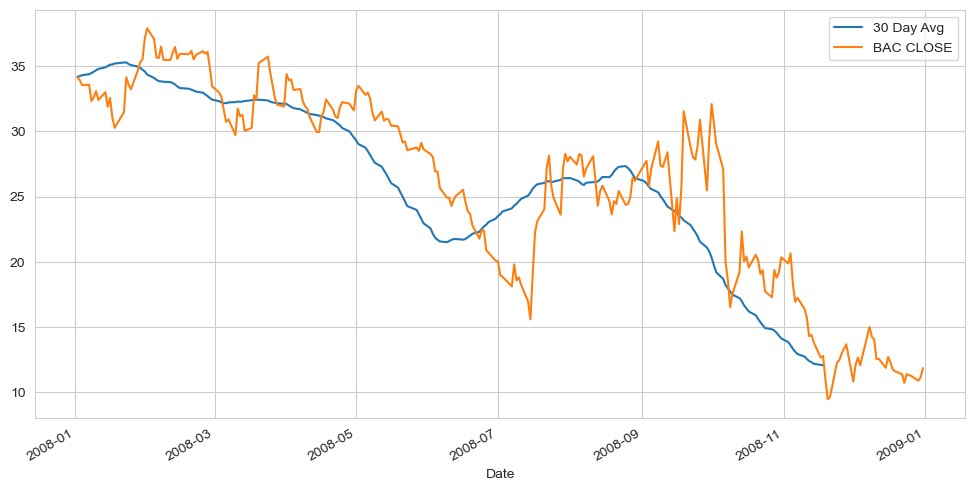

In [28]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008'].plot(label='BAC CLOSE')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price using seaborn library.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

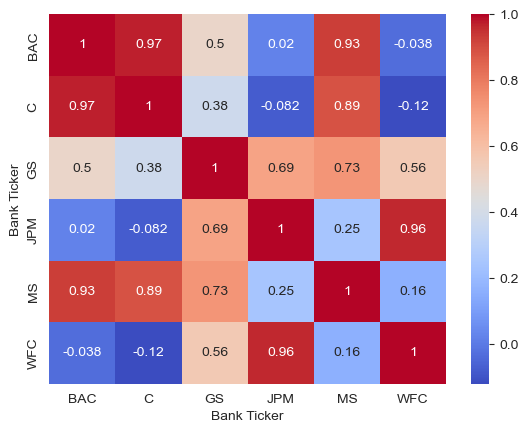

In [29]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

**Use seaborn's clustermap to cluster the correlations together**

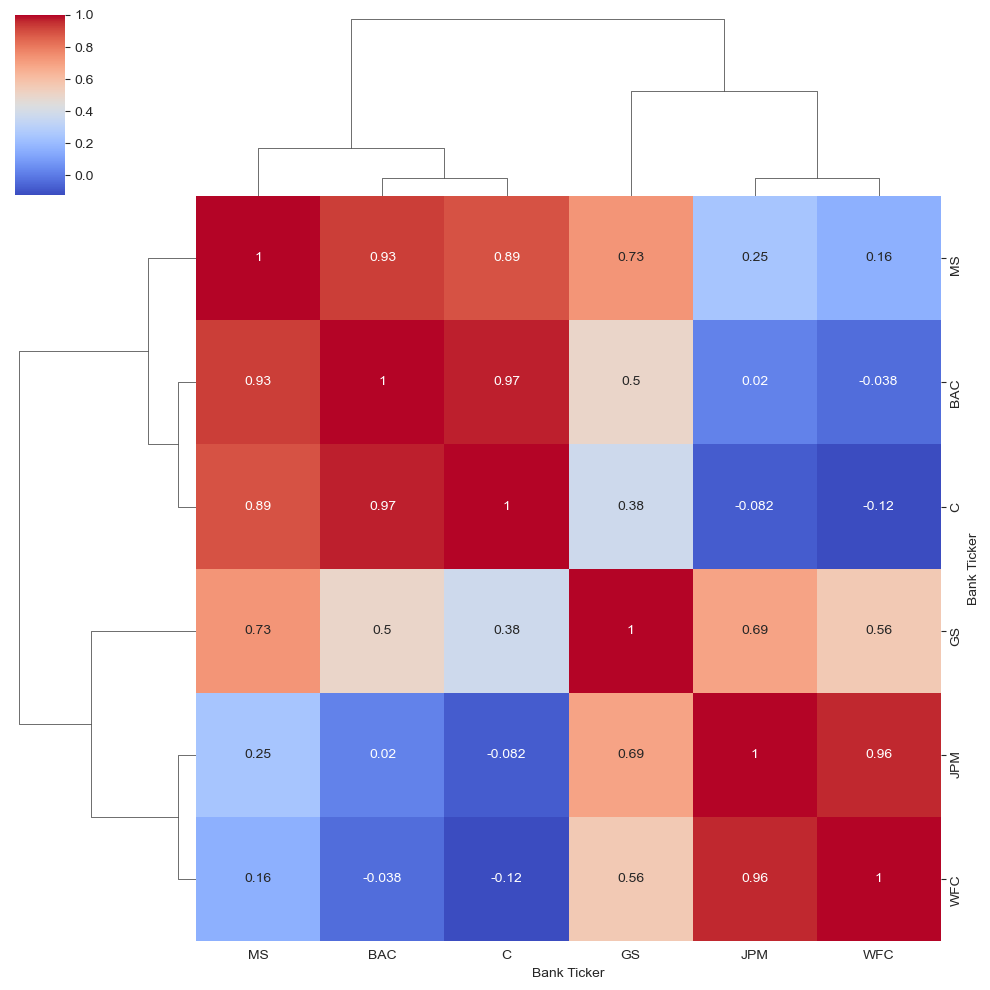

In [30]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

**Plotly way of creating heatmap of the correlation between the stocks Close Price using cufflinks library**

In [31]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [32]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Use .iplot() method to create a candlestick plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [33]:
BAC[['Open', 'High','Low','Close']].loc['2015'].iplot(kind='candle')

# Technical Analysis (= ta) Plots

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley's Close Price for the year 2015.**

In [34]:
MS['Close'].loc['2015'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America's Close Price for the year 2015.**

In [35]:
BAC['Close'].loc['2015'].ta_plot(study='boll')